# Diabetes Predicition

## Libraries

> Kumpulan library yang digunakan pada project

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.2.2 which is incompatible.


In [2]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, make_scorer
import pickle
import json

## Kaggle Config

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
total 0
cat: /root/.kaggle/kaggle.json: No such file or directory


In [4]:
# download dataset
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

Dataset URL: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
License(s): CC0-1.0
  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 165MB/s]


In [5]:
# unzip file
!unzip -jq /content/diabetes-health-indicators-dataset.zip

## Data Loading

>Data didapatan dari kaggle :
- https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
- data berisi data response survey diabetes

### Dataset Columns Info

1. Diabetes_012
    - 0 = no diabetes
    - 1 = prediabetes
    - 2 = diabetes

2. HighBP
    - 0 = no high BP
    - 1 = high BP

3. HighChol
    - 0 = no high cholesterol
    - 1 = high cholesterol

4. CholCheck
    - 0 = no cholesterol check in 5 years
    - 1 = yes cholesterol check in 5 years

5. BMI
    - Body Mass Index

6. Smoker

    Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
    - 0 = no
    - 1 = yes

7. Stroke

    (Ever told) you had a stroke.
    - 0 = no
    - 1 = yes

8. HeartDiseaseorAttack

    coronary heart disease (CHD) or myocardial infarction (MI)
    - 0 = no
    - 1 = yes

9. PhysActivity

    physical activity in past 30 days - not including job
    - 0 = no
    - 1 = yes

10. Fruits

    Consume Fruit 1 or more times per day
    - 0 = no
    - 1 = yes

11. Veggies

    Consume Vegetables 1 or more times per day
    - 0 = no
    - 1 = yes

12. HvyAlcoholConsump

    Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)
    - 0 = no
    - 1 = yes

13. AnyHealthcare

    Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc.
    - 0 = no
    - 1 = yes
14. NoDocbcCost

    Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?
    - 0 = no
    - 1 = yes
15. GenHlth

    Would you say that in general your health is: scale 1-5
    - 1 = excellent
    - 2 = very good
    - 3 = good
    - 4 = fair
    - 5 = poor
16. MentHlth
    - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
17. PhysHlth
    - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
18. DiffWalk

    Do you have serious difficulty walking or climbing stairs?
    - 0 = no
    - 1 = yes
19. Sex
    - 0 = female
    - 1 = male
20. Age

    13-level age category
    - 1 = 18-24
    - 2 = 25-29
    - 3 = 30-34
    - 4 = 35-39
    - 5 = 40-44
    - 6 = 45-49
    - 7 = 50-54
    - 8 = 55-59
    - 9 = 60-64
    - 10 = 65-69
    - 11 = 70-74
    - 12 = 75-79
    - 13 = 80 or older
21. Education

    Education level scale 1-6 :
    - 1 = Never attended school or only kindergarten
    - 2 = Grades 1 through 8 (Elementary)
    - 3 = Grades 9 through 11 (Some high school)
    - 4 = Grade 12 or GED (High school graduate)
    - 5 = College 1 year to 3 years (Some college or technical school)
    - 6 = College 4 years or more (College graduate)

22. Income

    Income scale 1-8
    - 1 = less than $10,000
    - 2 = Less than $15,000
    - 3 = Less than $20,000
    - 4 = Less than $25,000
    - 5 = less than $35,000
    - 6 = Less than $50,000
    - 7 = Less than $75,000
    - 8 = $75,000 or more

### Dataframe Summary

In [6]:
# Membuat dataframe dari file csv yang didapatkan dari kaggle
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
# membuat backup dataframe
dfBackup = df.copy()

In [8]:
# cek dataframe head
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Diabetes_012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
HighBP,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
HighChol,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
CholCheck,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,40.0,25.0,28.0,27.0,24.0,25.0,30.0,25.0,30.0,24.0
Smoker,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
Stroke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
PhysActivity,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
Fruits,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [9]:
df.tail(10).T

,253670,253671,253672,253673,253674,253675,253676,253677,253678,253679
Diabetes_012,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
HighBP,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
HighChol,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
CholCheck,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
BMI,25.0,23.0,30.0,42.0,27.0,45.0,18.0,28.0,23.0,25.0
Smoker,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Stroke,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HeartDiseaseorAttack,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
PhysActivity,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
Fruits,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0


In [10]:
# cek dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

dari hasil pengecekan dataframe memiliki 22 kolom, semua kolom bertipe float. Tidak terdapat nilai null pada dataframe.

In [11]:
# mengecek ukuran dataframe
df.shape

(253680, 22)

dataframe memiliki 253680 row data dan memiliki 22 kolom

In [12]:
# cek missing values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

data tidak memiliki nilai null

In [13]:
# cek duplicate
df.duplicated().sum()

23899

dataframe memiliki 23899 data duplicate.

In [14]:
# drop data duplicate
df = df.drop_duplicates()

# cek duplicate
df.duplicated().sum()

0

In [15]:
df.shape

(229781, 22)

## EDA(Exploratory Data Analysis)

>Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [16]:
dfEDA = df.copy()
dfEDA['BMI'].describe()

count    229781.00000
mean         28.68567
std           6.78636
min          12.00000
25%          24.00000
50%          27.00000
75%          32.00000
max          98.00000
Name: BMI, dtype: float64

<Axes: xlabel='WeightClass'>

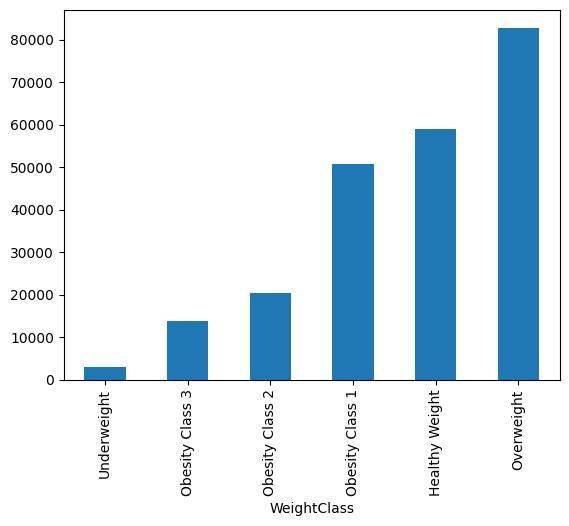

In [20]:
# membuat kolom baru dan mensortir data bedasarkan bminya
listBMI = []

for bmi in df['BMI']:
  if bmi >= 40:
    listBMI.append('Obesity Class 3')
  elif 35 <= bmi < 40:
    listBMI.append('Obesity Class 2')
  elif 30 <= bmi < 35:
    listBMI.append('Obesity Class 1')
  elif 25 <= bmi < 30:
    listBMI.append('Overweight')
  elif 18.5 <= bmi < 25:
    listBMI.append('Healthy Weight')
  else:
    listBMI.append('Underweight')

dfEDA['WeightClass'] = listBMI

# menghitung jumlah peserta bedasarkan classnya
groupBmi = dfEDA.groupby(['WeightClass'])['BMI'].count().sort_values()
groupBmi.plot(kind='bar')

Dari plot ini, terlihat bahwa kategori `Healthy Weight` dan `Overweight` memiliki jumlah yang jauh lebih tinggi dibandingkan kategori lainnya. Ini mungkin menunjukkan bahwa sebagian besar populasi berada dalam dua kategori ini.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

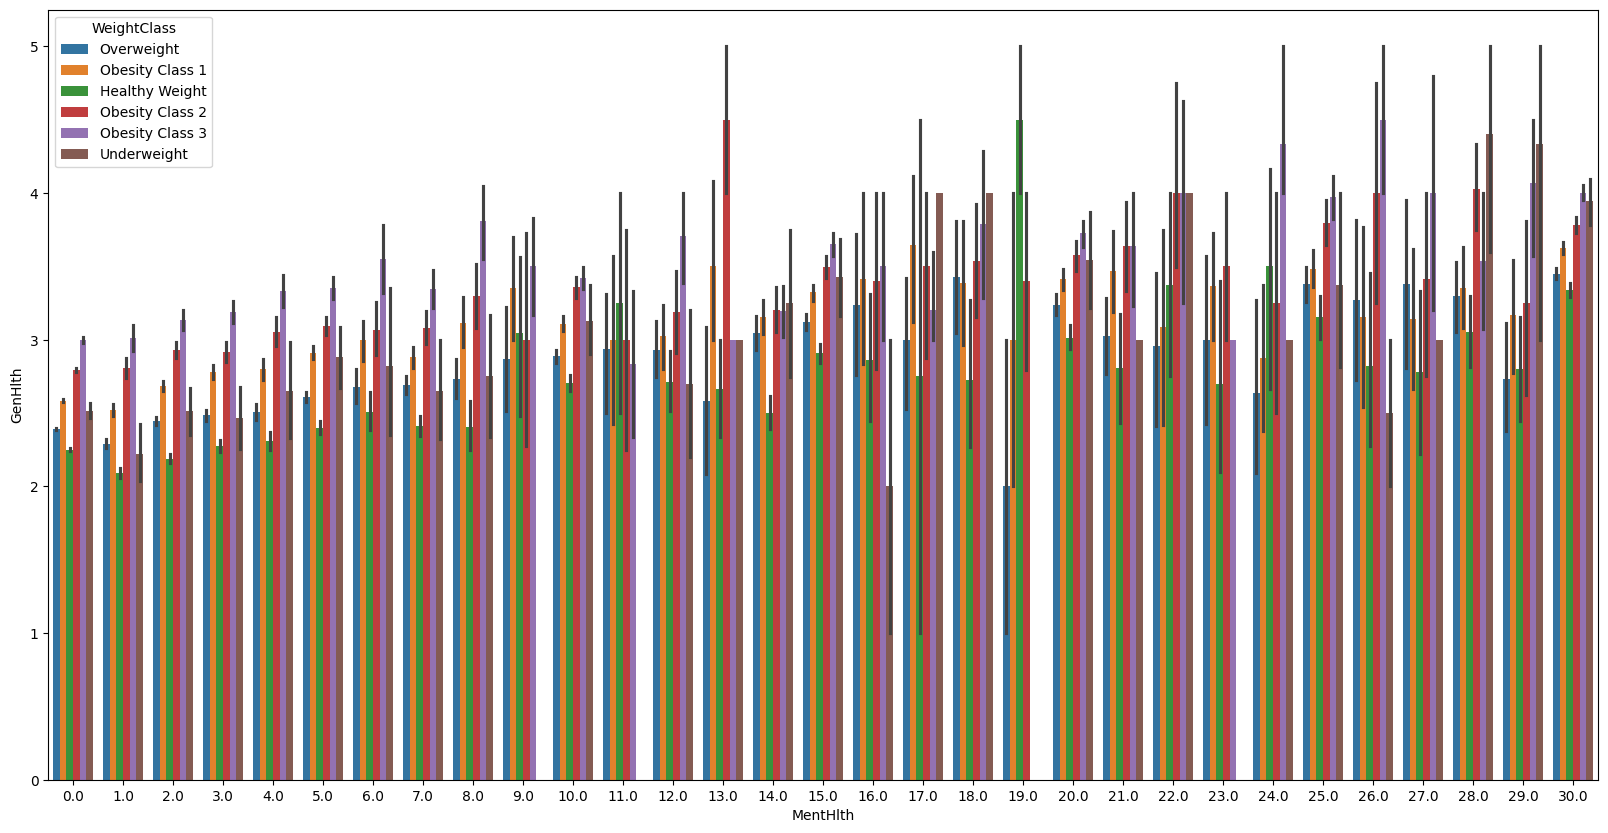

In [26]:
# bar chart terhadap WeightClass dengan GenHlth dan MentHlth
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=dfEDA, x='MentHlth', y='GenHlth', hue='WeightClass')
plt.show()

Dari plot ini dapat dilihat bahwa GenHlth(General Health) pada kategori `Healthy Weight` cenderung memiliki nilai general health yang lebih baik, sedangkan kategori `Obesity Class 3` cenderung memiliki general health yang paling rendah dibandingkan kategori lainnya. Dari plot ini juga dapat dilihat bahwa MenHlth(Mental Health) pada kategori `Healthy Weight` cenderung memiliki nilai mental health yang lebih baik, sedangkan kategori `Obesity Class 3` dan `Obesity Class 2` cenderung memiliki mental health yang paling rendah dibandingkan kategori lainnya.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

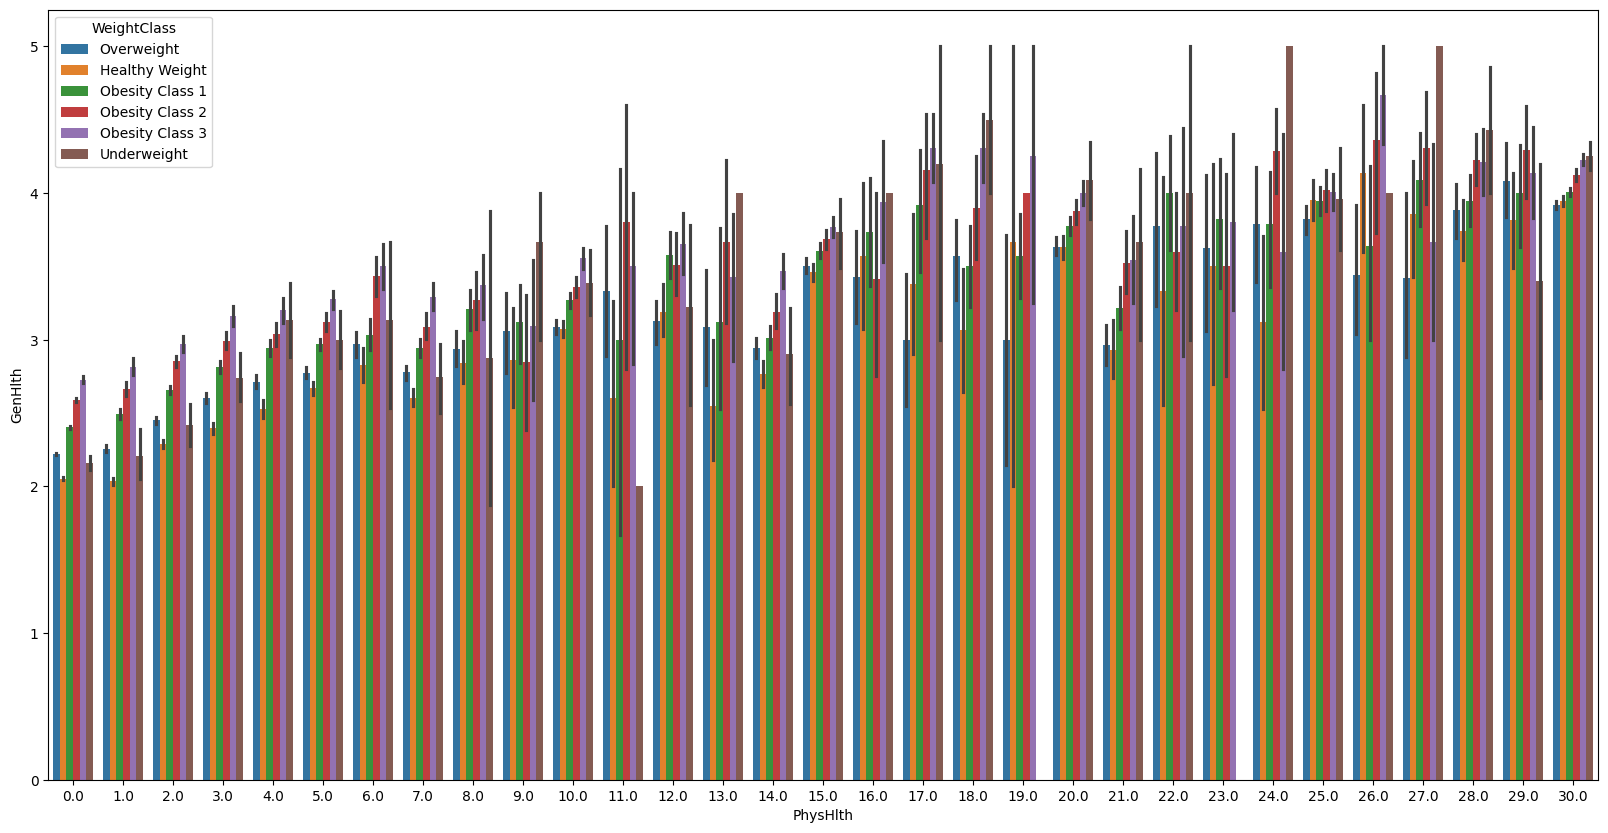

In [29]:
# bar chart terhadap WeightClass dengan GenHlth dan PhysHlth
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=dfEDA, x='PhysHlth', y='GenHlth', hue='WeightClass')
plt.show()

Dari plot ini dapat dilihat bahwa GenHlth(General Health) pada kategori `Healthy Weight` cenderung memiliki nilai general health yang lebih baik, sedangkan kategori `Obesity Class 3` cenderung memiliki general health yang paling rendah dibandingkan kategori lainnya. Dari plot ini juga dapat dilihat bahwa PhysHlth(Physical Health) pada kategori `Healthy Weight` cenderung `memiliki` nilai physical health yang lebih baik, sedangkan kategori `Obesity Class 3` cenderung memiliki physical health yang paling rendah dibandingkan kategori lainnya.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

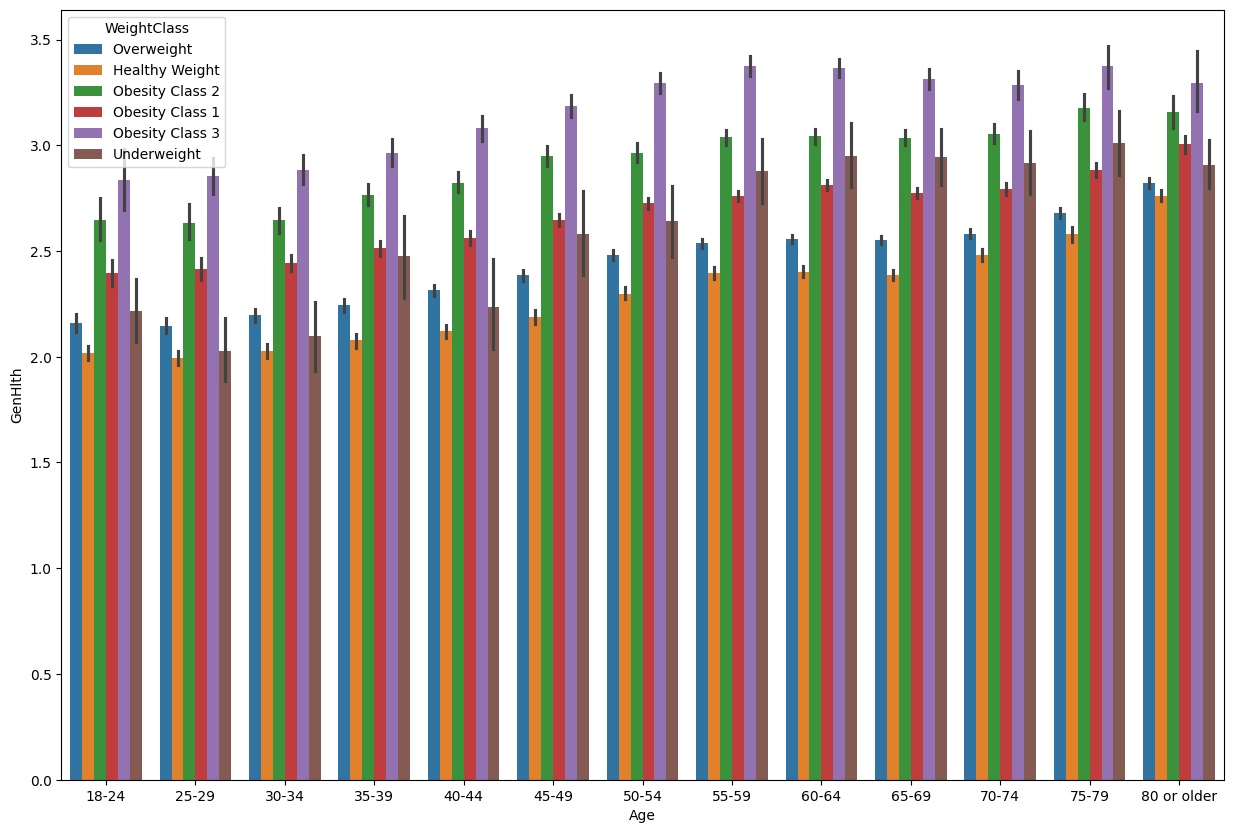

In [38]:
# bar chart terhadap WeightClass dengan GenHlth dan Age

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=dfEDA, x='Age', y='GenHlth', hue='WeightClass')

# label untuk kolom Age
ageLebels = ['18-24', '25-29', '30-34', '35-39', '40-44',
              '45-49', '50-54', '55-59', '60-64',
              '65-69', '70-74', '75-79', '80 or older']
ax.set_xticks(range(len(ageLebels)))
ax.set_xticklabels(ageLebels)

plt.show()

Dari plot ini dapat dilihat bahwa pada kategori `Healthy Weight` cenderung memiliki nilai general health yang lebih baik seiring bertambahnya usia, sedangkan kategori `Obesity Class 3` cenderung memiliki general health yang paling buruk seiring bertambahnya usia.

## Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti seleksi kolom apa saja yang digunakan, mencari cardinality, pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [40]:
# mengelompokan kolom bedasarkan tipe data numerik atau kategorik
numerik = ['BMI']
kategorik = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
             'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
             'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
             'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
             'Sex', 'Education', 'Income']

print('Data Numerik', numerik)
print('Data kategorik', kategorik)

Data Numerik ['BMI']
Data kategorik ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']


### Feature Selection

In [41]:
listKolomNum = [] # membuat variabel penampung kolom numerik
listKolomKat = [] # membuat variabel penampung kolom kategorik

# mencari korelasi terhadap y yang inputnya berupa numerik
for kol in numerik:
    corrK, pValK = stats.kendalltau(df['Diabetes_012'], df[kol])

    if pValK < 0.05:
        listKolomNum.append(kol)

# mencari korelasi terhadap y yang inputnya berupa kategorik
for kol in kategorik:
    contingency_table = pd.crosstab(df['Diabetes_012'], df[kol])
    chi2 = stats.chi2_contingency(contingency_table)

    if chi2.pvalue < 0.05:
        listKolomKat.append(kol)

print(f"Kolom Numerik : {listKolomNum}")
print(f"Kolom Kategorik : {listKolomKat}")

Kolom Numerik : ['BMI']
Kolom Kategorik : ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']


### Feature Creation

#### Cardinality

In [42]:
# cek unik value pada kolom yang memiliki tipe data object
df[kategorik].nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Education                6
Income                   8
dtype: int64

In [43]:
# cek nilai unik
for kol in listKolomKat:
    print(f"Jumlah unik data pada kolom {kol} : {int(df[kol].unique().sum())} \nData: {df[kol].sort_values().unique()}")

Jumlah unik data pada kolom Diabetes_012 : 3 
Data: [0. 1. 2.]
Jumlah unik data pada kolom HighBP : 1 
Data: [0. 1.]
Jumlah unik data pada kolom HighChol : 1 
Data: [0. 1.]
Jumlah unik data pada kolom CholCheck : 1 
Data: [0. 1.]
Jumlah unik data pada kolom Smoker : 1 
Data: [0. 1.]
Jumlah unik data pada kolom Stroke : 1 
Data: [0. 1.]
Jumlah unik data pada kolom HeartDiseaseorAttack : 1 
Data: [0. 1.]
Jumlah unik data pada kolom PhysActivity : 1 
Data: [0. 1.]
Jumlah unik data pada kolom Fruits : 1 
Data: [0. 1.]
Jumlah unik data pada kolom Veggies : 1 
Data: [0. 1.]
Jumlah unik data pada kolom HvyAlcoholConsump : 1 
Data: [0. 1.]
Jumlah unik data pada kolom AnyHealthcare : 1 
Data: [0. 1.]
Jumlah unik data pada kolom NoDocbcCost : 1 
Data: [0. 1.]
Jumlah unik data pada kolom GenHlth : 15 
Data: [1. 2. 3. 4. 5.]
Jumlah unik data pada kolom MentHlth : 465 
Data: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.

### Split between x dan y

In [44]:
# menjabarkan x dan y
x = df.drop('Diabetes_012', axis=1)
y = df[['Diabetes_012']]

print('Data x', x)
print('Data y', y)

Data x         HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253675     1.0       1.0        1.0  45.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                        0.0           0.0     0.0      1.0  ...   
1                        0.0           1.0     0.0      0.0  ...   
2                        0.0           0.0     1.0      

In [45]:
# memperbarui kelompok numerik dan kategorik
numerik = ['BMI']
kategorik = ['HighBP', 'HighChol', 'CholCheck',
             'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity',
             'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
             'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
             'Sex', 'Education', 'Income']

print('Data Numerik', numerik)
print('Data kategorik', kategorik)

Data Numerik ['BMI']
Data kategorik ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Education', 'Income']


### Split between Train-set and Test-set

In [46]:
# split data dengan composisi 70% dan 30% dimana 70% data latih, dan 30% data uji
xTrain,xTest,yTrain,yTest = train_test_split(x,y, test_size=0.3, random_state=0)

print('Ukuran Train Set : ', xTrain.shape)
print('Ukuran Test Set  : ', xTest.shape)

Ukuran Train Set :  (160846, 21)
Ukuran Test Set  :  (68935, 21)


In [47]:
xTrain

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85141,1.0,1.0,1.0,27.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,1.0,12.0,4.0,7.0
97625,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,6.0,6.0,7.0
73487,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,7.0,0.0,0.0,1.0,4.0,4.0,7.0
162732,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,3.0,30.0,1.0,0.0,13.0,5.0,5.0
167528,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,7.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193286,1.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,15.0,1.0,0.0,1.0,8.0,5.0,6.0
126789,1.0,0.0,0.0,49.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,2.0,10.0,0.0,1.0,8.0,3.0,4.0
189541,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,8.0,6.0,4.0
45451,0.0,0.0,1.0,32.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,6.0,5.0,8.0


In [48]:
xTest

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
239542,0.0,1.0,1.0,17.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,4.0,2.0,30.0,1.0,0.0,11.0,5.0,6.0
160709,1.0,1.0,1.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,8.0,6.0,3.0
186940,0.0,0.0,1.0,23.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,6.0,5.0
78094,0.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,6.0,6.0,8.0
236541,1.0,1.0,1.0,44.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201448,0.0,0.0,1.0,22.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,6.0
191536,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,6.0,5.0,7.0
73475,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,6.0,3.0,8.0
244879,0.0,0.0,1.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,0.0,1.0,10.0,5.0,2.0


### Feature Transformation

#### Outlier Handling

In [49]:
# cek distribusi
listItem = []

for col in numerik:
  skew = x[col].skew()

  if -1 < skew and skew > 1:
    skewness = 'Highly Skewed'
  elif (-1 <= skew < -0.05) or (0.05 < skew <= 1):
    skewness = 'Moderately Skewed'
  else:
    skewness = 'Aproximately Symmetric'
  listItem.append([col, skew, skewness])

pd.DataFrame(columns=['nama', 'nilai skewness', 'skewness'], data = listItem)

,nama,nilai skewness,skewness
0,BMI,2.063938,Highly Skewed


Dilihat dari hasil cek skewness kolom BMI memiliki skewness yang tinggi

In [50]:
# melakukan capping pada data yang skew dengan metode Z-score/Gausian
winsoriser = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=numerik,
                            missing_values='ignore')

xTrainCapped = winsoriser.fit_transform(xTrain)
xTestCapped = winsoriser.transform(xTest)

In [51]:
# membuat fungsi untuk membuat histogram dan boxplot
def diagnosticPlots(df, variable):
    # menjabarkan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

BMI - Sebelum Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


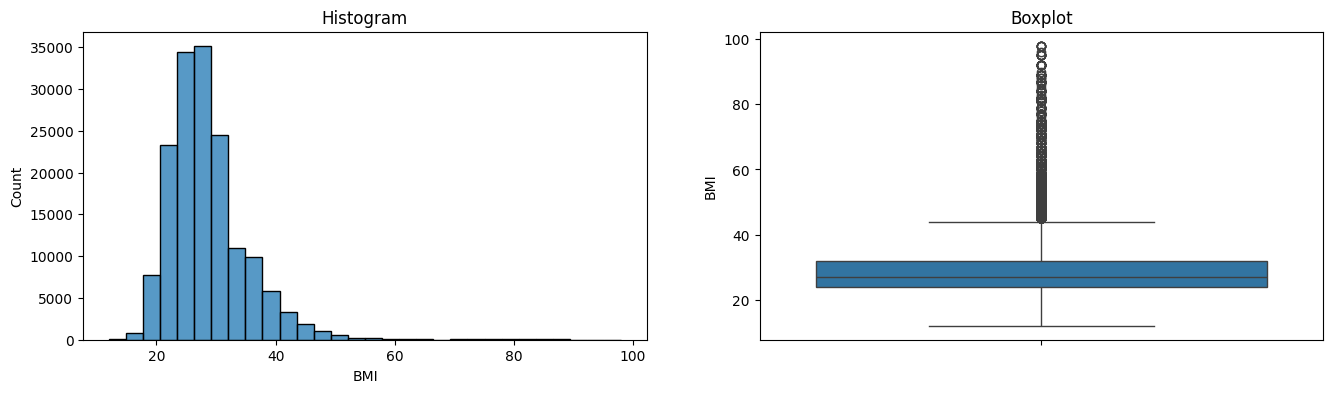


BMI - Sesudah Capping


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


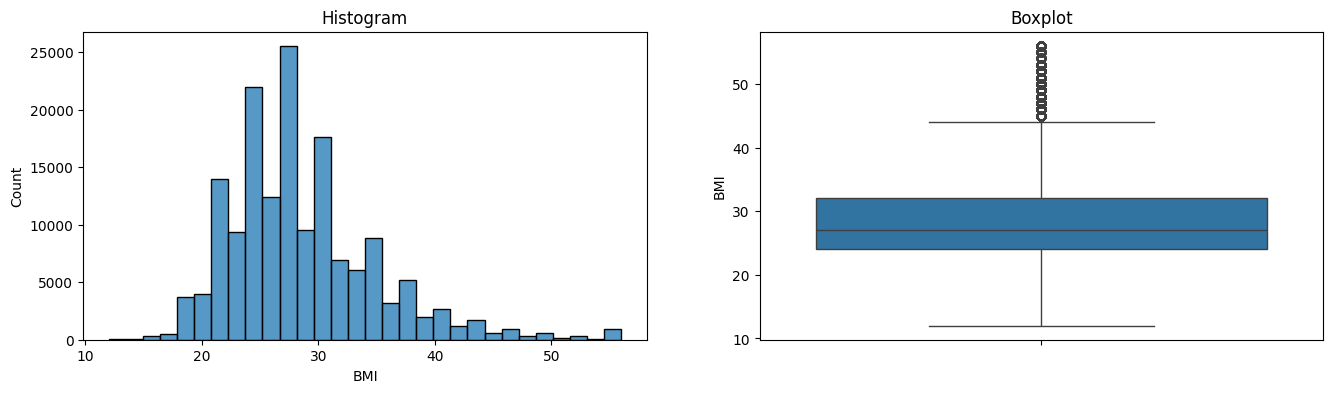

In [52]:
# Cek distribusi setelah
for col in numerik:
  print(f'{col} - Sebelum Capping')
  diagnosticPlots(xTrain, col)

  print(f'\n{col} - Sesudah Capping')
  diagnosticPlots(xTrainCapped, col)

#### Missing Values Handling

In [53]:
# cek missing values
xTrainCapped.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Karna tidak memiliki missing values maka proses dihentikan sampai pengecekan saja.

tidak dilakukan encoding karna data kategorik sudah terencode

### Column Transformer

In [54]:
# menjabarkan preprocessing agar dapat digunakan untuk pipeline
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), listKolomNum)
])

## Model Definition

> Metode yang digunakan adalah KNN, SVM, Decision Tree, Random Forest, GBoost.

### Baseline Model

#### KNN

In [55]:
# menjabarkan model menggunakan KNN
pipeKNN = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

#### SVM

In [56]:
# menjabarkan model model menggunakan SVM
pipeSVM = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf'))
])

#### Decision Tree

In [57]:
# menjabarkan model menggunakan Decision Tree
pipeDT = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

#### Random Forest

In [58]:
# menjabarkan model menggunakan Random Forest
pipeRF = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

#### Gradient Boost

In [59]:
# menjabarkan model menggunakan GBoost
pipeGB = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())
])

## Model Training

### KNN

In [60]:
#Train model
%%time

pipeKNN.fit(xTrainCapped, yTrain)

CPU times: user 88.6 ms, sys: 932 µs, total: 89.6 ms
Wall time: 108 ms


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['BMI'])])),
                ('classifier', KNeighborsClassifier())])

### SVM

In [61]:
#Train model
%%time

pipeSVM.fit(xTrainCapped, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 4min 51s, sys: 575 ms, total: 4min 51s
Wall time: 4min 54s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['BMI'])])),
                ('classifier', SVC())])

### Decision Tree

In [62]:
#Train model
%%time

pipeDT.fit(xTrainCapped, yTrain)

CPU times: user 60.9 ms, sys: 15 µs, total: 60.9 ms
Wall time: 79.6 ms


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['BMI'])])),
                ('classifier', DecisionTreeClassifier())])

### Random Forest

In [63]:
#Train model
%%time

pipeRF.fit(xTrainCapped, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


CPU times: user 5.06 s, sys: 10.6 ms, total: 5.07 s
Wall time: 5.18 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['BMI'])])),
                ('classifier', RandomForestClassifier())])

### Gradient Boost

In [64]:
#Train model
%%time

pipeGB.fit(xTrainCapped, yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 14.4 s, sys: 37.3 ms, total: 14.4 s
Wall time: 14.5 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', RobustScaler(),
                                                  ['BMI'])])),
                ('classifier', GradientBoostingClassifier())])

## Model Evaluation

> Classification Info :
- 0 adalah no diabetes
- 1 adalah prediabetes
- 2 adalah diabetes

In [65]:
# membuat custom f1 score
weightedF1Score = make_scorer(f1_score, average='weighted')

### KNN

In [66]:
# mengevaluasi hasil dari model
yPredTrainKNN = pipeKNN.predict(xTrainCapped)
yPredTestKNN = pipeKNN.predict(xTestCapped)
yPredTrainKNN

array([0., 0., 0., ..., 0., 0., 0.])

In [67]:
# Evaluasi model
# Train
f1TrainCV_KNN = cross_val_score(pipeKNN,
                                     xTrainCapped,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_KNN)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_KNN.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_KNN.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_KNN.mean()-f1TrainCV_KNN.std()) , '-', (f1TrainCV_KNN.mean()+f1TrainCV_KNN.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

F1 Score - All - Cross Validation  :  [0.75375817 0.75644546 0.76066544 0.74741823 0.75964362]
F1 Score - Mean - Cross Validation :  0.755586182271274
F1 Score - Std - Cross Validation  :  0.0047551480614427535
F1 Score - Range of Test-Set       :  0.7508310342098313 - 0.7603413303327168


F1 Score - Test Set   :  0.7561689838004595 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.97      0.90     56750
         1.0       0.00      0.00      0.00      1398
         2.0       0.33      0.08      0.12     10787

    accuracy                           0.81     68935
   macro avg       0.39      0.35      0.34     68935
weighted avg       0.73      0.81      0.76     68935
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix      : 


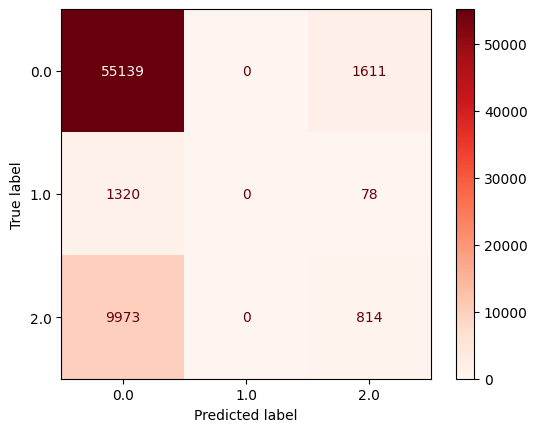

In [68]:
# Evaluasi model
# Test
f1TestKNN = f1_score(yTest, yPredTestKNN, average='weighted')

print('F1 Score - Test Set   : ', f1TestKNN, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTestKNN), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeKNN, xTestCapped, yTest, cmap='Reds'))

### SVM

In [69]:
# mengevaluasi hasil dari model
yPredTrainSVM = pipeSVM.predict(xTrainCapped)
yPredTestSVM = pipeSVM.predict(xTestCapped)
yPredTrainSVM

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
# Evaluasi model
# Train
f1TrainCV_SVM = cross_val_score(pipeSVM,
                                     xTrainCapped,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_SVM)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_SVM.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_SVM.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_SVM.mean()-f1TrainCV_SVM.std()) , '-', (f1TrainCV_SVM.mean()+f1TrainCV_SVM.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

F1 Score - All - Cross Validation  :  [0.7511481  0.75118422 0.75118422 0.75118422 0.75118422]
F1 Score - Mean - Cross Validation :  0.7511769965298638
F1 Score - Std - Cross Validation  :  1.4447428325103928e-05
F1 Score - Range of Test-Set       :  0.7511625491015387 - 0.7511914439581889


F1 Score - Test Set   :  0.7434272877746652 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     56750
         1.0       0.00      0.00      0.00      1398
         2.0       0.00      0.00      0.00     10787

    accuracy                           0.82     68935
   macro avg       0.27      0.33      0.30     68935
weighted avg       0.68      0.82      0.74     68935
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix      : 


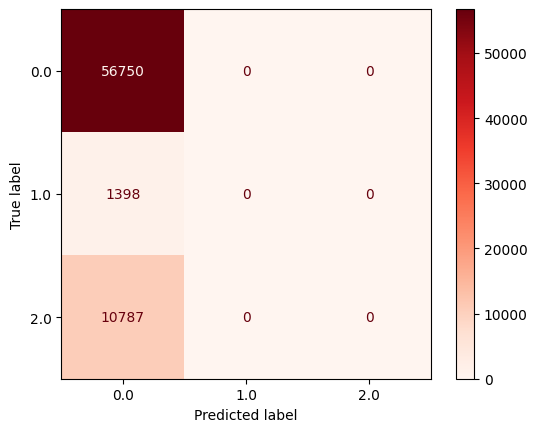

In [71]:
# Evaluasi model
# Test
f1TestSVM = f1_score(yTest, yPredTestSVM, average='weighted')

print('F1 Score - Test Set   : ', f1TestSVM, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTestSVM), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeSVM, xTestCapped, yTest, cmap='Reds'))

### Decision Tree

In [72]:
# mengevaluasi hasil dari model
yPredTrainDT = pipeDT.predict(xTrainCapped)
yPredTestDT = pipeDT.predict(xTestCapped)
yPredTrainDT

array([0., 0., 0., ..., 0., 0., 0.])

In [73]:
# Evaluasi model
# Train
f1TrainCV_DT = cross_val_score(pipeDT,
                                     xTrainCapped,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_DT)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_DT.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_DT.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_DT.mean()-f1TrainCV_DT.std()) , '-', (f1TrainCV_DT.mean()+f1TrainCV_DT.std()))

F1 Score - All - Cross Validation  :  [0.7511481  0.75118422 0.75118422 0.75118422 0.75118422]
F1 Score - Mean - Cross Validation :  0.7511769965298638
F1 Score - Std - Cross Validation  :  1.4447428325103928e-05
F1 Score - Range of Test-Set       :  0.7511625491015387 - 0.7511914439581889


F1 Score - Test Set   :  0.7434272877746652 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     56750
         1.0       0.00      0.00      0.00      1398
         2.0       0.00      0.00      0.00     10787

    accuracy                           0.82     68935
   macro avg       0.27      0.33      0.30     68935
weighted avg       0.68      0.82      0.74     68935
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix      : 


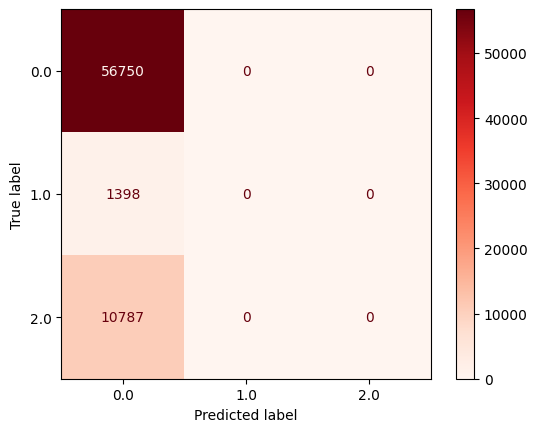

In [74]:
# Evaluasi model
# Test
f1TestDT = f1_score(yTest, yPredTestDT, average='weighted')

print('F1 Score - Test Set   : ', f1TestDT, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTestDT), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeDT, xTestCapped, yTest, cmap='Reds'))

### Random Forest

In [75]:
# mengevaluasi hasil dari model
yPredTrainRF = pipeRF.predict(xTrainCapped)
yPredTestRF = pipeRF.predict(xTestCapped)
yPredTrainRF

array([0., 0., 0., ..., 0., 0., 0.])

In [76]:
# Evaluasi model
# Train
f1TrainCV_RF = cross_val_score(pipeRF,
                                     xTrainCapped,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_RF)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_RF.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_RF.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_RF.mean()-f1TrainCV_RF.std()) , '-', (f1TrainCV_RF.mean()+f1TrainCV_RF.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

F1 Score - All - Cross Validation  :  [0.7511481  0.75118422 0.75118422 0.75118422 0.75118422]
F1 Score - Mean - Cross Validation :  0.7511769965298638
F1 Score - Std - Cross Validation  :  1.4447428325103928e-05
F1 Score - Range of Test-Set       :  0.7511625491015387 - 0.7511914439581889


F1 Score - Test Set   :  0.7434272877746652 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     56750
         1.0       0.00      0.00      0.00      1398
         2.0       0.00      0.00      0.00     10787

    accuracy                           0.82     68935
   macro avg       0.27      0.33      0.30     68935
weighted avg       0.68      0.82      0.74     68935
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix      : 


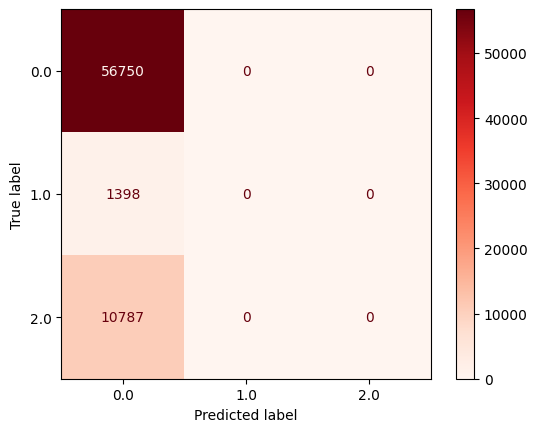

In [77]:
# Evaluasi model
# Test
f1TestRF = f1_score(yTest, yPredTestRF, average='weighted')

print('F1 Score - Test Set   : ', f1TestRF, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTestRF), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeRF, xTestCapped, yTest, cmap='Reds'))

### Gradient Boost

In [78]:
# mengevaluasi hasil dari model
yPredTrainGB = pipeGB.predict(xTrainCapped)
yPredTestGB = pipeGB.predict(xTestCapped)
yPredTrainGB

array([0., 0., 0., ..., 0., 0., 0.])

In [79]:
# Evaluasi model
# Train
f1TrainCV_GB = cross_val_score(pipeGB,
                                     xTrainCapped,
                                     yTrain,
                                     cv=5,
                                     scoring=weightedF1Score)

print('F1 Score - All - Cross Validation  : ', f1TrainCV_GB)
print('F1 Score - Mean - Cross Validation : ', f1TrainCV_GB.mean())
print('F1 Score - Std - Cross Validation  : ', f1TrainCV_GB.std())
print('F1 Score - Range of Test-Set       : ', (f1TrainCV_GB.mean()-f1TrainCV_GB.std()) , '-', (f1TrainCV_GB.mean()+f1TrainCV_GB.std()))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

F1 Score - All - Cross Validation  :  [0.7511481  0.75118422 0.75118422 0.75118422 0.75118422]
F1 Score - Mean - Cross Validation :  0.7511769965298638
F1 Score - Std - Cross Validation  :  1.4447428325103928e-05
F1 Score - Range of Test-Set       :  0.7511625491015387 - 0.7511914439581889


F1 Score - Test Set   :  0.7434272877746652 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     56750
         1.0       0.00      0.00      0.00      1398
         2.0       0.00      0.00      0.00     10787

    accuracy                           0.82     68935
   macro avg       0.27      0.33      0.30     68935
weighted avg       0.68      0.82      0.74     68935
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix      : 


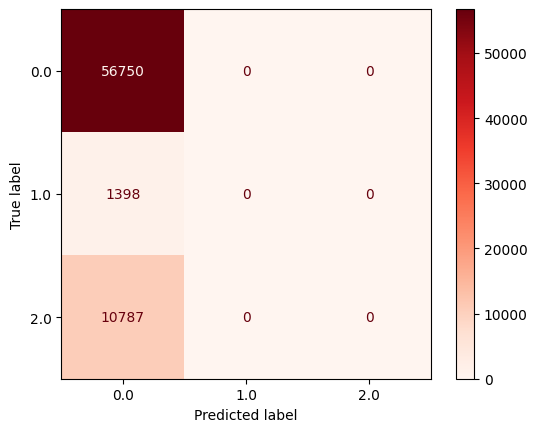

In [80]:
# Evaluasi model
# Test
f1TestGB = f1_score(yTest, yPredTestGB, average='weighted')

print('F1 Score - Test Set   : ', f1TestGB, '\n')
print('Classification Report : \n', classification_report(yTest, yPredTestGB), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipeGB, xTestCapped, yTest, cmap='Reds'))

### Evaluasi model untuk mencari yang terbaik

In [81]:
# mencari model terbaik
modelName = ['KNN', 'SVM', 'Decision Tree', 'Random Forest', 'GBoost']
ModelTrainScore = [round(f1TrainCV_KNN.max(), 4), round(f1TrainCV_SVM.max(), 4), round(f1TrainCV_DT.max(), 4), round(f1TrainCV_RF.max(), 4), round(f1TrainCV_GB.max(), 4)]
ModelTestScore = [round(f1TestKNN, 4), round(f1TestSVM, 4), round(f1TestDT, 4), round(f1TestRF, 4), round(f1TestGB, 4)]

pd.DataFrame(
    {'Model Name': modelName,
     'F1 Score - Train Set': ModelTrainScore,
     'F1 Score - Test Set': ModelTestScore
    })

,Model Name,F1 Score - Train Set,F1 Score - Test Set
0,KNN,0.7607,0.7562
1,SVM,0.7512,0.7434
2,Decision Tree,0.7512,0.7434
3,Random Forest,0.7512,0.7434
4,GBoost,0.7512,0.7434


dari hasil evaluasi diatas dapat dilihat :
- KNN memiliki F1 Score train dan test terbaik, dengan fittingnya good fit
- SVM, Decistion Tree, Random Forest, Gradient Boost memiliki f1 score yang sama baik untuk train dan test, dengan fitting good fit

### Train Model Terbaik dengan Hypertunning

In [82]:
# menjabarkan hyperparameter
nNeighbors  = [int(x) for x in range(1, 21)]
knnSearchParam = {'classifier__n_neighbors':nNeighbors}
knnSearchParam

{'classifier__n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20]}

In [83]:
# train model KNN
%%time

randomCV_KNN = RandomizedSearchCV(pipeKNN,
                                 param_distributions=knnSearchParam,
                                 n_iter=10,
                                 cv=5,
                                 random_state=0,
                                 n_jobs=-1,
                                 scoring='f1')

randomCV_KNN.fit(xTrainCapped, yTrain)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


CPU times: user 2.7 s, sys: 555 ms, total: 3.26 s
Wall time: 3min 48s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               RobustScaler(),
                                                                               ['BMI'])])),
                                             ('classifier',
                                              KNeighborsClassifier())]),
                   n_jobs=-1,
                   param_distributions={'classifier__n_neighbors': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10, 11,
                                                                    12, 13, 14,
                                                                    15, 16, 17,
                                                                    18, 19,
                                                                    20]},
                   random_state=0, scoring='f1')

In [84]:
# mencari hyperparameter terbaik
randomCV_KNN.best_params_

{'classifier__n_neighbors': 19}

In [85]:
# menyimpan hyperparameter terbaik
randomCV_KNN_best = randomCV_KNN.best_estimator_

F1 Score - Train Set   :  0.7548736414896273 

F1 Score - Test Set   :  0.7470750033437912 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90     56750
         1.0       0.00      0.00      0.00      1398
         2.0       0.37      0.01      0.03     10787

    accuracy                           0.82     68935
   macro avg       0.40      0.34      0.31     68935
weighted avg       0.74      0.82      0.75     68935
 



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix      : 


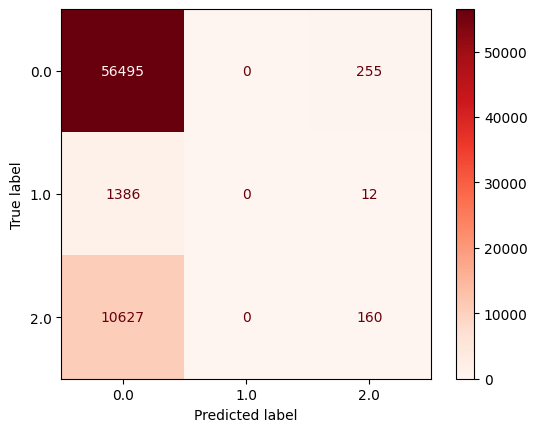

In [86]:
# Evaluasi model KNN
yBestTrain = randomCV_KNN_best.predict(xTrainCapped)
yBestTest = randomCV_KNN_best.predict(xTestCapped)
f1BestTrain = f1_score(yTrain, yBestTrain, average='weighted')
f1BestTest = f1_score(yTest, yBestTest, average='weighted')

print('F1 Score - Train Set   : ', f1BestTrain, '\n')
print('F1 Score - Test Set   : ', f1BestTest, '\n')
print('Classification Report : \n', classification_report(yTest, yBestTest), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(randomCV_KNN_best, xTestCapped, yTest, cmap='Reds'))

In [87]:
# membandingkan baseline KNN dengan Hyperparameter KNN
# mencari model terbaik
modelName = ['KNN Baseline', 'KNN Hyperparameter']
ModelTrainScore = [round(f1TrainCV_KNN.max(), 4), round(f1BestTrain, 4)]
ModelTestScore = [round(f1TestKNN, 4), round(f1BestTest, 4)]

pd.DataFrame(
    {'Model Name': modelName,
     'F1 Score - Train Set': ModelTrainScore,
     'F1 Score - Test Set': ModelTestScore,
    })

,Model Name,F1 Score - Train Set,F1 Score - Test Set
0,KNN Baseline,0.7607,0.7562
1,KNN Hyperparameter,0.7549,0.7471


Dari hasil perbandingan, KNN baseline memiliki F1 Score yang lebih tinggi daripada KNN dengan hyperparameter.

## Model Saving

In [88]:
#Menyimpan File, Scaler, Encoder, Model
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(numerik, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(kategorik, file_2)

with open('modelBest.pkl', 'wb') as file_3:
  pickle.dump(pipeKNN, file_3)

## Conclusion

1. Dari Hasil EDA ini adalah bahwa sebagian besar populasi berada dalam kategori `Healthy Weight` dan `Overweight`. Kategori `Healthy Weight` cenderung memiliki nilai GenHlth (General Health), MentHlth (Mental Health), dan PhysHlth (Physical Health) yang lebih baik dibandingkan kategori lainnya, terutama `Obesity Class 3`, yang memiliki nilai kesehatan terendah. Selain itu, seiring bertambahnya usia, individu dalam kategori `Healthy Weight` cenderung mempertahankan kesehatan umum yang lebih baik, sementara individu dalam kategori `Obesity Class 3` cenderung mengalami penurunan kesehatan umum..
2. Dari hasil Model Evaluation, didapatkan model `KNN` bekerja lebih baik dari pada model lainnya dan model `baseline KNN bekerja` lebih baik dari pada model `KNN dengan hyperparameter`.
3. Data terdapat `imbalance` sehingga membuat hasil F1 Score dibawah 80, karena lebih banyaknya data dimana orang tidak memiliki diabetes dari pada prediabetes ataupun yang memiliki diabetes sehingga menyebabkan prediksi cendrung mengarah ke tidak memiliki diabetes.